## Perceptron

### The following code will train a single layer neural network with one neuron and two inputs.
###  This neural network is known as the Perceptron algorithm
The expected result are the two weights updated according to training data. The training data consists on different points in the cartesian plane with knowledge of the color of each point.The resulting wieights represent a line which will separate the different dots by color in the case they are separable.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[14])

In [2]:
# Simulation parameters
NUMBER_OF_ITERATIONS = 10
NUMBER_OF_RED_DOTS = 40
NUMBER_OF_GREEN_DOTS = 40
MEAN_X_RED_DOTS = -2
MEAN_Y_RED_DOTS = -1
SD_X_RED_DOTS = 1
SD_Y_RED_DOTS = 1.5
MEAN_X_GREEN_DOTS = 1.5
MEAN_Y_GREEN_DOTS = 1
SD_X_GREEN_DOTS = 1
SD_Y_GREEN_DOTS = 1.5

In [3]:
# Training data creation
redDotsX = np.random.normal(MEAN_X_RED_DOTS, SD_X_RED_DOTS, NUMBER_OF_RED_DOTS)
redDotsY = np.random.normal(MEAN_Y_RED_DOTS, SD_Y_RED_DOTS, NUMBER_OF_RED_DOTS)
redDotsColor = ['red']*redDotsX.size
greenDotsX = np.random.normal(MEAN_X_GREEN_DOTS, SD_X_GREEN_DOTS, NUMBER_OF_GREEN_DOTS)
greenDotsY = np.random.normal(MEAN_Y_GREEN_DOTS, SD_X_GREEN_DOTS, NUMBER_OF_GREEN_DOTS)
greenDotsColor = ['green']*greenDotsX.size

trainingData = pd.DataFrame()
trainingData['x'] = pd.concat([pd.Series(redDotsX), pd.Series(greenDotsX)]).reset_index(drop=True)
trainingData['y'] = pd.concat([pd.Series(redDotsY), pd.Series(greenDotsY)]).reset_index(drop=True)
trainingData['color'] = pd.concat([pd.Series(redDotsColor), pd.Series(greenDotsColor)]).reset_index(drop=True)
trainingData.head(1)

,x,y,color
0,-2.897617,0.231568,red


In [4]:
# Axis limits
XMIN = trainingData['x'].min() -1
XMAX = trainingData['x'].max() +1
YMIN = trainingData['y'].min() -1
YMAX = trainingData['y'].max() +1
XLIM = [XMIN, XMAX]
YLIM = [YMIN, YMAX]

(-6.923398692117983, 3.87508844688615)

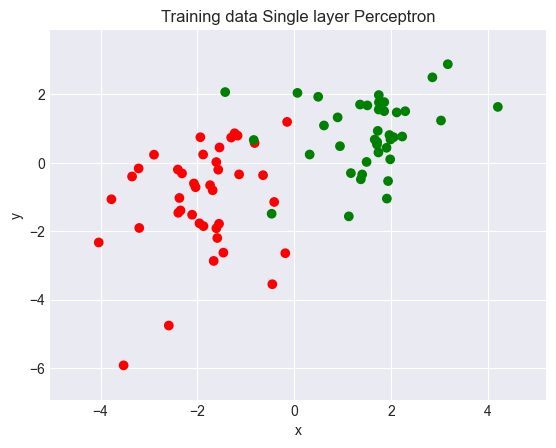

In [5]:
# Check the training data by itself
plt.scatter(trainingData['x'], trainingData['y'], c=trainingData['color'])
plt.grid()
plt.title('Training data Single layer Perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(XLIM)
plt.ylim(YLIM)

In [6]:
# Neural Network data
perceptronData = pd.DataFrame()
perceptronData['w1'] = [0]
perceptronData['w2'] = [0]
perceptronData['w3'] = [0]
perceptronData['activation'] = [1]
perceptronData['learningRate'] = [1]
perceptronData['y'] = [1]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3436\1660311998.py:9: RuntimeWarning: invalid value encountered in true_divide
  y = (x*perceptronData['w1'].iloc[0] + perceptronData['w3'].iloc[0]*perceptronData['learningRate'].iloc[0])/-perceptronData['w2'].iloc[0]


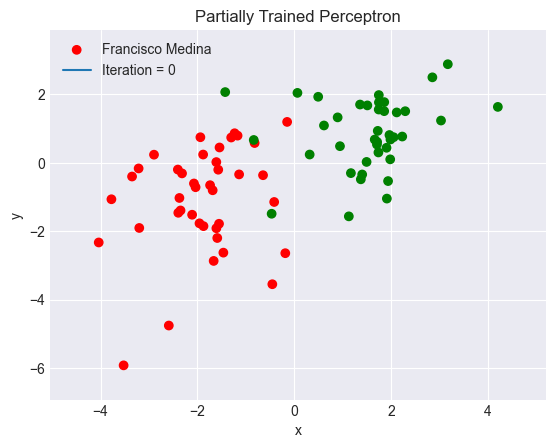

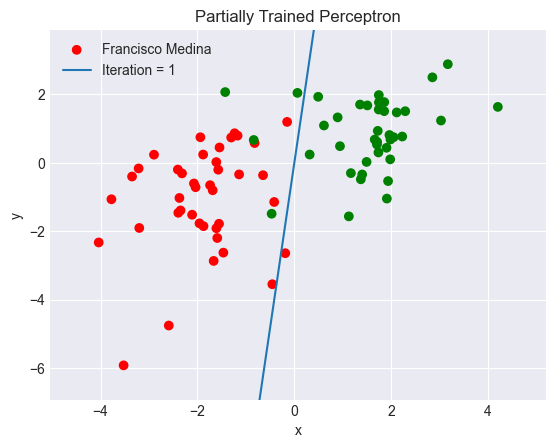

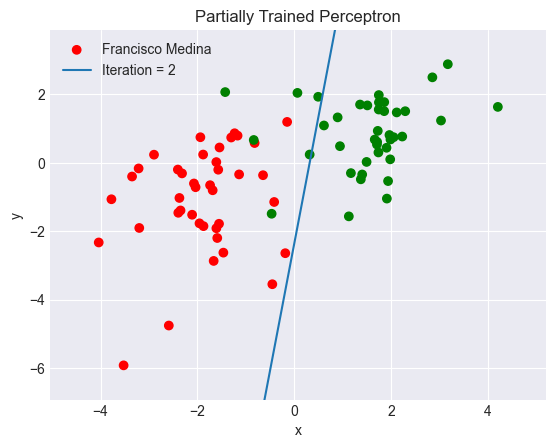

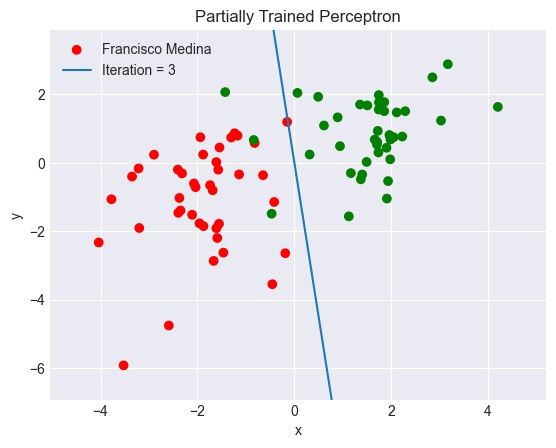

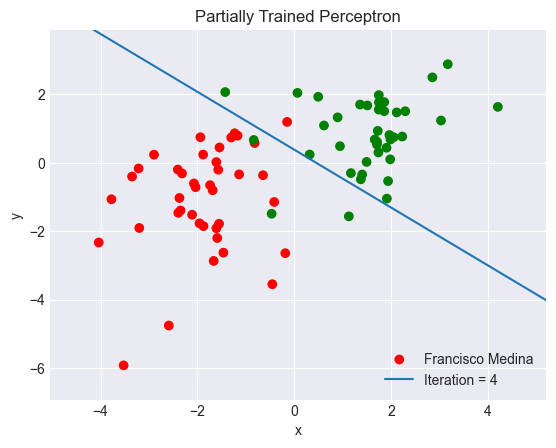

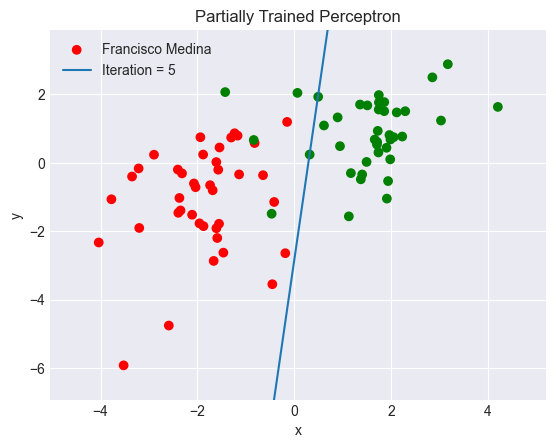

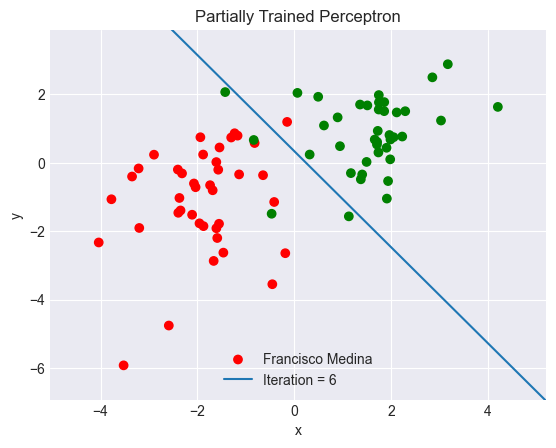

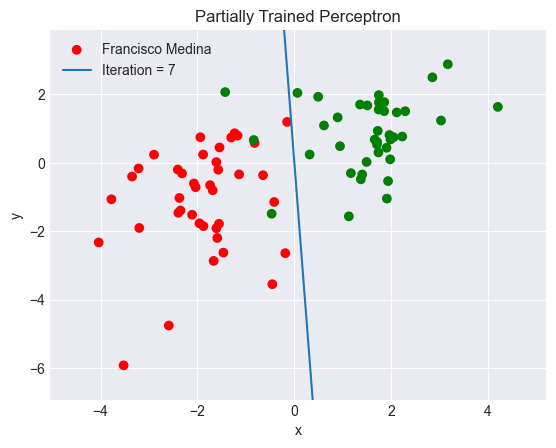

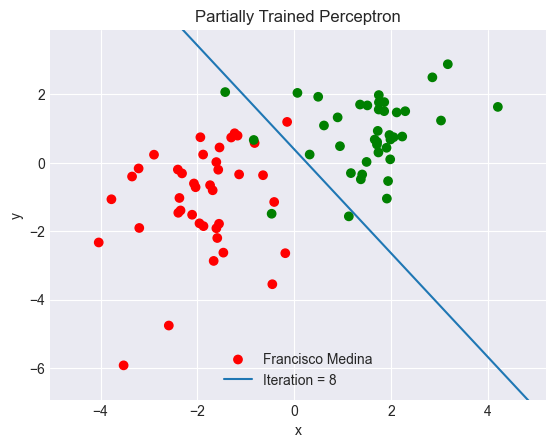

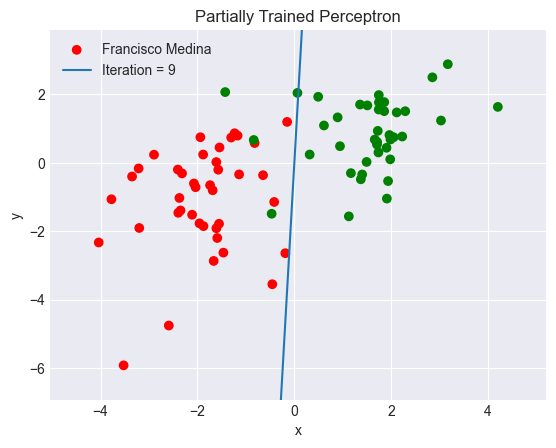

<Figure size 640x480 with 0 Axes>

In [7]:
# Neural Network training process
iteration = 0
greenDots = trainingData.loc[trainingData['color'] == 'green']
redDots = trainingData.loc[trainingData['color'] == 'red']
while iteration < NUMBER_OF_ITERATIONS:
    # Plot the partially trained line
    plt.scatter(trainingData['x'], trainingData['y'], c=trainingData['color'])
    x = np.arange(-10,10,0.1)
    y = (x*perceptronData['w1'].iloc[0] + perceptronData['w3'].iloc[0]*perceptronData['learningRate'].iloc[0])/-perceptronData['w2'].iloc[0]
    plt.plot(x, y)
    plt.grid()
    plt.title('Partially Trained Perceptron')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(XLIM)
    plt.ylim(YLIM)
    plt.legend(['Francisco Medina', 'Iteration = ' + str(iteration)])
    plt.figure().clear()
    for i in range(greenDots.shape[0]):
        perceptronData['y'] = perceptronData['w1']*greenDots.iloc[i, 0] + perceptronData['w2']*greenDots.iloc[i, 1] + perceptronData['w3']*perceptronData['learningRate']
        if (perceptronData.y.iloc[0] <= 0):
            perceptronData['w1'] = perceptronData['w1'] + greenDots.iloc[i, 0]*perceptronData['learningRate']
            perceptronData['w2'] = perceptronData['w2'] + greenDots.iloc[i, 1]*perceptronData['learningRate']
            perceptronData['w3'] = perceptronData['w3'] + perceptronData['activation']*perceptronData['learningRate']
            
    for i in range(redDots.shape[0]):
        perceptronData['y'] = perceptronData['w1']*redDots.iloc[i, 0] + perceptronData['w2']*redDots.iloc[i, 1] + perceptronData['w3']*perceptronData['learningRate']
        if (perceptronData.y.iloc[0] >= 0):
            perceptronData['w1'] = perceptronData['w1'] - redDots.iloc[i, 0]*perceptronData['learningRate']
            perceptronData['w2'] = perceptronData['w2'] - redDots.iloc[i, 1]*perceptronData['learningRate']
            perceptronData['w3'] = perceptronData['w3'] - perceptronData['activation']*perceptronData['learningRate']
    iteration += 1

    

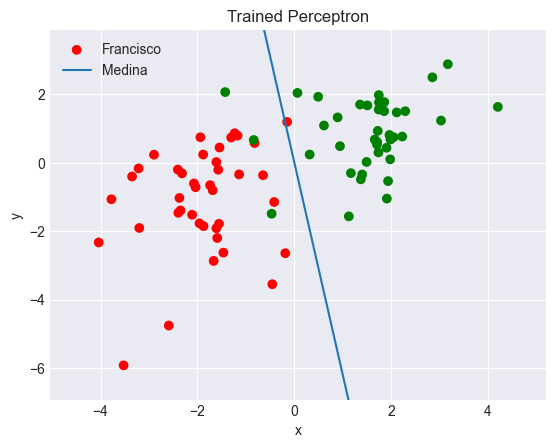

In [8]:
# Plot of line in cartesian plane with updated weights
plt.scatter(trainingData['x'], trainingData['y'], c=trainingData['color'])
x = np.arange(-10,10,0.1)
y = (x*perceptronData['w1'].iloc[0] + perceptronData['w3'].iloc[0]*perceptronData['learningRate'].iloc[0])/-perceptronData['w2'].iloc[0]
plt.plot(x, y)
plt.grid()
plt.title('Trained Perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.legend(['Francisco', 'Medina'])